In [1]:
import scanpy as sc 
import pandas as pd
import SEACells
import numpy as np
import matplotlib
from statistics import mode
import matplotlib.pyplot as plt
from statistics import mode
import sys 
sys.path.insert(0, '../')
import utils
from importlib import reload
reload(utils)
from utils import *
import seaborn as sns
# Some plotting aesthetics
%matplotlib inline
sns.set_style('ticks')
matplotlib.rcParams['figure.figsize'] = [4, 4]
matplotlib.rcParams['figure.dpi'] = 100


# Input Data Directory
data_path = "../Cell-Type-Specific-Graphs/Data/"
# Output Results Directory
save_path_results = "../Cell-Type-Specific-Graphs/Results/"

In [2]:
adata = sc.read(data_path + 'LINCS_L1000.h5ad')
adata

AnnData object with n_obs × n_vars = 883269 × 978
    obs: 'cell_id', 'det_plate', 'det_well', 'lincs_phase', 'pert_dose', 'pert_dose_unit', 'pert_id', 'pert_iname', 'pert_mfc_id', 'pert_time', 'pert_time_unit', 'pert_type', 'rna_plate', 'rna_well', 'condition', 'cell_type', 'dose', 'cov_drug_dose_name', 'cov_drug_name', 'control', 'canonical_smiles', 'SMILES', 'paired_control_index', 'cell_type_split_0', 'cell_type_split_1', 'cell_type_split_2', 'cell_type_split_3', 'cell_type_split_4', 'random_split_0', 'random_split_1', 'random_split_2', 'random_split_3', 'random_split_4', 'drug_split_0', 'drug_split_1', 'drug_split_2', 'drug_split_3', 'drug_split_4', 'cov_drug_dose_name_split_0', 'cov_drug_dose_name_split_1', 'cov_drug_dose_name_split_2', 'cov_drug_dose_name_split_3', 'cov_drug_dose_name_split_4'
    var: 'pr_gene_title', 'pr_is_lm', 'pr_is_bing'
    uns: 'cydata_pull'

In [3]:
adata.var.pr_is_lm

DDR1      1
PAX8      1
RPS5      1
ABCF1     1
SPAG7     1
         ..
PPARD     1
GNA11     1
WDTC1     1
PLSCR3    1
NPEPL1    1
Name: pr_is_lm, Length: 978, dtype: int64

In [4]:
adata.var.loc[adata.var.pr_is_lm == 1]

,pr_gene_title,pr_is_lm,pr_is_bing
DDR1,discoidin domain receptor tyrosine kinase 1,1,1
PAX8,paired box 8,1,1
RPS5,ribosomal protein S5,1,1
ABCF1,ATP binding cassette subfamily F member 1,1,1
SPAG7,sperm associated antigen 7,1,1
...,...,...,...
PPARD,peroxisome proliferator activated receptor delta,1,1
GNA11,guanine nucleotide binding protein (G protein)...,1,1
WDTC1,WD and tetratricopeptide repeats 1,1,1
PLSCR3,phospholipid scramblase 3,1,1


In [5]:
cross_tab = pd.crosstab(adata.obs['cell_type'], adata.obs['condition'])
cross_tab

condition,"1,2,3,4,5,6-hexabromocyclohexane","1,2,3,4-tetrahydroisoquinoline","1,2-dichlorobenzene","1,2-propylene-glycol",1-benzylimidazole,1-methylisoquinoline,1-monopalmitin,1-phenylbiguanide,"2',5'-dideoxyadenosine",2-(4-methoxybenzylthio)-6-methylpyrimidin-4-ol,...,zimelidine,ziprasidone,zolantidine,zolmitriptan,zolpidem,zonisamide,zopiclone,zosuquidar,zoxazolamine,zuclopenthixol
cell_type,,,,,,,,,,,,,,,,,,,,,
A375,5,0,3,0,4,0,5,5,30,4,...,6,21,5,7,26,23,0,20,6,3
A549,5,0,6,0,4,0,4,3,7,4,...,6,6,5,9,8,6,0,6,5,6
A673,0,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0
AGS,0,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0
ASC,3,0,4,0,0,0,2,1,0,0,...,0,3,3,4,0,0,0,3,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
U266,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
U937,0,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0
VCAP,0,0,12,0,10,0,0,0,9,10,...,9,10,7,17,19,9,0,10,10,12


In [6]:
cell_lines = list(adata.obs.cell_type.value_counts().head(5).index.values)
cell_lines

['MCF7', 'VCAP', 'PC3', 'A375', 'HT29']

In [7]:
adata = adata[adata.obs.cell_type.isin(cell_lines), adata.var.pr_is_lm == 1]
adata

View of AnnData object with n_obs × n_vars = 503196 × 978
    obs: 'cell_id', 'det_plate', 'det_well', 'lincs_phase', 'pert_dose', 'pert_dose_unit', 'pert_id', 'pert_iname', 'pert_mfc_id', 'pert_time', 'pert_time_unit', 'pert_type', 'rna_plate', 'rna_well', 'condition', 'cell_type', 'dose', 'cov_drug_dose_name', 'cov_drug_name', 'control', 'canonical_smiles', 'SMILES', 'paired_control_index', 'cell_type_split_0', 'cell_type_split_1', 'cell_type_split_2', 'cell_type_split_3', 'cell_type_split_4', 'random_split_0', 'random_split_1', 'random_split_2', 'random_split_3', 'random_split_4', 'drug_split_0', 'drug_split_1', 'drug_split_2', 'drug_split_3', 'drug_split_4', 'cov_drug_dose_name_split_0', 'cov_drug_dose_name_split_1', 'cov_drug_dose_name_split_2', 'cov_drug_dose_name_split_3', 'cov_drug_dose_name_split_4'
    var: 'pr_gene_title', 'pr_is_lm', 'pr_is_bing'
    uns: 'cydata_pull'

In [8]:
adata.obs.pert_id.unique()
adata.obs['pert_id'] = adata.obs['pert_id'].replace('DMSO', 'control')

In [9]:
adata.obs.loc[adata.obs.pert_id == "control"].cell_type.value_counts()

cell_type
MCF7    6447
PC3     5932
VCAP    4900
A375    4235
HT29    4014
Name: count, dtype: int64

In [10]:
adata.var.reset_index(inplace = True)
adata.var.rename({"index": "gene_name"}, axis=1, inplace=True)
adata.var.set_index("gene_name", inplace = True)
adata.var

,pr_gene_title,pr_is_lm,pr_is_bing
gene_name,,,
DDR1,discoidin domain receptor tyrosine kinase 1,1,1
PAX8,paired box 8,1,1
RPS5,ribosomal protein S5,1,1
ABCF1,ATP binding cassette subfamily F member 1,1,1
SPAG7,sperm associated antigen 7,1,1
...,...,...,...
PPARD,peroxisome proliferator activated receptor delta,1,1
GNA11,guanine nucleotide binding protein (G protein)...,1,1
WDTC1,WD and tetratricopeptide repeats 1,1,1


In [11]:
ctrl_adata = adata[adata.obs.pert_id == "control", :].copy()
ctrl_adata

AnnData object with n_obs × n_vars = 25528 × 978
    obs: 'cell_id', 'det_plate', 'det_well', 'lincs_phase', 'pert_dose', 'pert_dose_unit', 'pert_id', 'pert_iname', 'pert_mfc_id', 'pert_time', 'pert_time_unit', 'pert_type', 'rna_plate', 'rna_well', 'condition', 'cell_type', 'dose', 'cov_drug_dose_name', 'cov_drug_name', 'control', 'canonical_smiles', 'SMILES', 'paired_control_index', 'cell_type_split_0', 'cell_type_split_1', 'cell_type_split_2', 'cell_type_split_3', 'cell_type_split_4', 'random_split_0', 'random_split_1', 'random_split_2', 'random_split_3', 'random_split_4', 'drug_split_0', 'drug_split_1', 'drug_split_2', 'drug_split_3', 'drug_split_4', 'cov_drug_dose_name_split_0', 'cov_drug_dose_name_split_1', 'cov_drug_dose_name_split_2', 'cov_drug_dose_name_split_3', 'cov_drug_dose_name_split_4'
    var: 'pr_gene_title', 'pr_is_lm', 'pr_is_bing'
    uns: 'cydata_pull'

In [12]:
ctrl_adata.X

array([[ 9.3698   ,  4.418    ,  8.467    , ...,  8.0524   ,  8.2463   ,
         6.734    ],
       [ 6.868    ,  5.3619   ,  9.3663   , ...,  8.5473   ,  7.0152   ,
         6.763    ],
       [ 6.7837   ,  4.1719   ,  9.0224   , ...,  7.7894   ,  7.1739   ,
         6.7942   ],
       ...,
       [ 6.7612495,  3.94315  ,  8.539499 , ..., 10.82785  ,  9.295349 ,
         8.622351 ],
       [ 6.7283497,  4.15     ,  8.5402   , ..., 10.76325  ,  9.37595  ,
         6.9753   ],
       [ 6.00595  ,  3.5609498,  9.451225 , ...,  9.59755  ,  9.4889   ,
         7.0133   ]], dtype=float32)

In [13]:
import os
import networkx as nx
from torch_geometric.utils.convert import from_networkx
from sklearn.metrics import mean_squared_error
from torch_geometric.data import InMemoryDataset, Data, download_url, extract_zip, HeteroData, Batch
from torch_geometric.utils import *
import torch
from torch import nn
cell_type_network = {}
# Leaf directory 
directory = "LINCS"
# Parent Directories 
parent_dir = "/../Cell-Type-Specific-Graphs/graphs/"
# Path 
path = os.path.join(parent_dir, directory)
print(path)
try: 
    os.makedirs(path) 
except:
    print("File exists!")
max_nodes = 0
genes_pos = []
for cell_type in ctrl_adata.obs.cell_type.unique():
    print(cell_type)
    cell = Correlation_matrix(ctrl_adata, cell_type, 'cell_type',
                       hv_genes_cells = None, union_HVGs = True)
    threshold = np.percentile(np.abs(cell[0].values), 99.0)
    print("threshold:", threshold)
    g = create_coexpression_graph(ctrl_adata, cell, cell_type, threshold, 'gene_name')
    if g.num_nodes >= max_nodes:
        max_nodes = g.num_nodes
    cell_type_network[cell_type] = g
    genes_pos.append(cell_type_network[cell_type].pos)
    cell_type_network[cell_type].pos = torch.tensor(cell_type_network[cell_type].pos)
    torch.save(cell_type_network[cell_type] , os.path.join(path,cell_type+'_coexpr_graph.pkl'))

cell_type_network

/../Cell-Type-Specific-Graphs/graphs/LINCS
File exists!
A375
threshold: 0.6265973127553554
number_of_edges before the threshold (5000 x 5000):  956484
number_of_edges after the threshold:  9566
number_of_edges after removing self loops:  8588
final number_of_edges:  8588
HT29
threshold: 0.6296268183968503
number_of_edges before the threshold (5000 x 5000):  956484
number_of_edges after the threshold:  9566
number_of_edges after removing self loops:  8588
final number_of_edges:  8588
MCF7
threshold: 0.579240238949252
number_of_edges before the threshold (5000 x 5000):  956484
number_of_edges after the threshold:  9566
number_of_edges after removing self loops:  8588
final number_of_edges:  8588
PC3
threshold: 0.5902245646273322
number_of_edges before the threshold (5000 x 5000):  956484
number_of_edges after the threshold:  9566
number_of_edges after removing self loops:  8588
final number_of_edges:  8588
VCAP
threshold: 0.6098745953060718
number_of_edges before the threshold (5000 x 50

{'A375': Data(x=[405, 4235], edge_index=[2, 8588], edge_attr=[8588], pos=[405]),
 'HT29': Data(x=[457, 4014], edge_index=[2, 8588], edge_attr=[8588], pos=[457]),
 'MCF7': Data(x=[466, 6447], edge_index=[2, 8588], edge_attr=[8588], pos=[466]),
 'PC3': Data(x=[460, 5932], edge_index=[2, 8588], edge_attr=[8588], pos=[460]),
 'VCAP': Data(x=[374, 4900], edge_index=[2, 8588], edge_attr=[8588], pos=[374])}

In [14]:
adata.obs['condition'] = adata.obs['condition'].replace('DMSO', 'control')
adata.obs['condition']

index
REP.A001_A375_24H_X1_B22:A03-2       control
REP.A001_A375_24H_X1_B22:A04-2       control
REP.A001_A375_24H_X1_B22:A05-2       control
REP.A001_A375_24H_X1_B22:A06-2       control
REP.A001_A375_24H_X1_B22:B03-2       control
                                     ...    
PCLB003_PC3_24H_X3_B13:P20-1      wortmannin
PCLB003_PC3_24H_X3_B13:P21-1      wortmannin
PCLB003_PC3_24H_X3_B13:P22-1      wortmannin
PCLB003_PC3_24H_X3_B13:P23-1      wortmannin
PCLB003_PC3_24H_X3_B13:P24-1      wortmannin
Name: condition, Length: 503196, dtype: category
Categories (16782, object): ['1,2,3,4,5,6-hexabromocyclohexane', '1,2-dichlorobenzene', '1-benzylimidazole', '1-monopalmitin', ..., 'zopiclone', 'zosuquidar', 'zoxazolamine', 'zuclopenthixol']

In [15]:
# Compute the crosstab
crosstab_result = pd.crosstab(adata.obs['cell_type'], adata.obs['condition'])

# Identify drugs (conditions) that appear in at least one cell type with fewer than 30 samples
drugs_to_remove = crosstab_result.columns[crosstab_result.lt(50).any()]

# Filter out those drugs from the dataset
adata = adata[~adata.obs['condition'].isin(drugs_to_remove)]

In [16]:
adata

View of AnnData object with n_obs × n_vars = 39689 × 978
    obs: 'cell_id', 'det_plate', 'det_well', 'lincs_phase', 'pert_dose', 'pert_dose_unit', 'pert_id', 'pert_iname', 'pert_mfc_id', 'pert_time', 'pert_time_unit', 'pert_type', 'rna_plate', 'rna_well', 'condition', 'cell_type', 'dose', 'cov_drug_dose_name', 'cov_drug_name', 'control', 'canonical_smiles', 'SMILES', 'paired_control_index', 'cell_type_split_0', 'cell_type_split_1', 'cell_type_split_2', 'cell_type_split_3', 'cell_type_split_4', 'random_split_0', 'random_split_1', 'random_split_2', 'random_split_3', 'random_split_4', 'drug_split_0', 'drug_split_1', 'drug_split_2', 'drug_split_3', 'drug_split_4', 'cov_drug_dose_name_split_0', 'cov_drug_dose_name_split_1', 'cov_drug_dose_name_split_2', 'cov_drug_dose_name_split_3', 'cov_drug_dose_name_split_4'
    var: 'pr_gene_title', 'pr_is_lm', 'pr_is_bing'
    uns: 'cydata_pull'

In [17]:
adata.obs['cov_drug'] = adata.obs.cell_type.astype(str) + '_' + adata.obs.condition.astype(str)

In [18]:
len(adata.obs['cov_drug'].unique())
len(adata.obs['condition'].unique())

12

In [19]:
adata.write(data_path + 'LINCS_L1000_processed.h5ad')
adata

AnnData object with n_obs × n_vars = 39689 × 978
    obs: 'cell_id', 'det_plate', 'det_well', 'lincs_phase', 'pert_dose', 'pert_dose_unit', 'pert_id', 'pert_iname', 'pert_mfc_id', 'pert_time', 'pert_time_unit', 'pert_type', 'rna_plate', 'rna_well', 'condition', 'cell_type', 'dose', 'cov_drug_dose_name', 'cov_drug_name', 'control', 'canonical_smiles', 'SMILES', 'paired_control_index', 'cell_type_split_0', 'cell_type_split_1', 'cell_type_split_2', 'cell_type_split_3', 'cell_type_split_4', 'random_split_0', 'random_split_1', 'random_split_2', 'random_split_3', 'random_split_4', 'drug_split_0', 'drug_split_1', 'drug_split_2', 'drug_split_3', 'drug_split_4', 'cov_drug_dose_name_split_0', 'cov_drug_dose_name_split_1', 'cov_drug_dose_name_split_2', 'cov_drug_dose_name_split_3', 'cov_drug_dose_name_split_4', 'cov_drug'
    var: 'pr_gene_title', 'pr_is_lm', 'pr_is_bing'
    uns: 'cydata_pull'

In [20]:
import numpy as np
import torch
import tqdm as tq
from scipy.spatial.distance import cdist

stim_data = adata[adata.obs.condition != 'control'].copy()
stim_data.layers['ctrl_x'] = stim_data.X
ctrl_data = adata[adata.obs.condition == 'control'].copy()

for cell_type in adata.obs.cell_type.unique():
    genes = cell_type_network[cell_type].pos.tolist()
    cell_type_network[cell_type].x = torch.mean(torch.tensor(ctrl_data[ctrl_data.obs.cell_type == cell_type, genes].copy().X), dim = 0)
    std = torch.var(torch.tensor(ctrl_data[ctrl_data.obs.cell_type == cell_type, genes].copy().X), dim = 0)
    cell_type_network[cell_type].x = torch.cat([cell_type_network[cell_type].x.unsqueeze(1), std.unsqueeze(1)], dim = 1)    

for cov_drug in tq.tqdm(stim_data.obs.cov_drug.unique()):
    cell_type = cov_drug.split('_')[0]
    
    # Get control and stimulated samples for this cell type
    ad_ctrl = ctrl_data[ctrl_data.obs.cell_type == cell_type].copy()
    ad_stim = stim_data[stim_data.obs.cov_drug == cov_drug].copy()
    
    # Extract expression matrices
    ctrl_X = ad_ctrl.X.toarray() if hasattr(ad_ctrl.X, "toarray") else ad_ctrl.X
    stim_X = ad_stim.X.toarray() if hasattr(ad_stim.X, "toarray") else ad_stim.X
    
    # Compute pairwise Euclidean distances
    distances = cdist(stim_X, ctrl_X, metric='euclidean')  # shape: (n_stim, n_ctrl)
    
    # Get the index of the closest control sample for each stim sample
    closest_ctrl_indices = np.argmin(distances, axis=1)
    selected_ctrl_X = ctrl_X[closest_ctrl_indices]
    # Save in the 'ctrl_x' layer
    stim_data[ad_stim.obs.index.values, :].layers['ctrl_x'] = selected_ctrl_X
    

100%|██████████| 55/55 [00:33<00:00,  1.66it/s]


In [21]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit import Chem, DataStructs
from tqdm import tqdm

import pandas as pd

# Define the file path
file_path = data_path + "SMILES_feat_all_datasets.csv"

# Read the Parquet file into a DataFrames
df = pd.read_csv(file_path)

# Define a list of drugs and their corresponding SMILES strings
canonical_smiles = {}
drug_smiles = adata.obs[['condition', 'SMILES']]
drug_smiles = dict(zip(drug_smiles['condition'], drug_smiles['SMILES']))
canonical_smiles = {}
for drug_name, smile in drug_smiles.items():
    if drug_name == 'control':
        continue  # Skip 'control'
    candidates = list(df.loc[df.SMILES == smile].values[0][1:])
    canonical_smiles[drug_name] = candidates

In [22]:
from importlib import reload
import utils
reload(utils)
from utils import *
cells_train = create_cells(stim_data, cell_type_network, canonical_smiles)

['A375', 'HT29', 'MCF7', 'PC3', 'VCAP']
Categories (5, object): ['A375', 'HT29', 'MCF7', 'PC3', 'VCAP'] ['estradiol', 'genistein', 'olaparib', 'dexamethasone', 'sirolimus', ..., 'vorinostat', 'trichostatin-a', 'geldanamycin', 'wortmannin', 'fulvestrant']
Length: 11
Categories (11, object): ['dexamethasone', 'estradiol', 'fulvestrant', 'geldanamycin', ..., 'tamoxifen', 'trichostatin-a', 'vorinostat', 'wortmannin']


Processing cov_drugs:   0%|          | 0/55 [00:00<?, ?it/s]

Processing A375_estradiol samples:   0%|          | 0/86 [00:00<?, ?it/s]

Processing HT29_estradiol samples:   0%|          | 0/91 [00:00<?, ?it/s]

Processing MCF7_estradiol samples:   0%|          | 0/343 [00:00<?, ?it/s]

Processing PC3_estradiol samples:   0%|          | 0/191 [00:00<?, ?it/s]

Processing A375_genistein samples:   0%|          | 0/111 [00:00<?, ?it/s]

Processing HT29_genistein samples:   0%|          | 0/117 [00:00<?, ?it/s]

Processing MCF7_genistein samples:   0%|          | 0/153 [00:00<?, ?it/s]

Processing PC3_genistein samples:   0%|          | 0/203 [00:00<?, ?it/s]

Processing A375_olaparib samples:   0%|          | 0/69 [00:00<?, ?it/s]

Processing HT29_olaparib samples:   0%|          | 0/63 [00:00<?, ?it/s]

Processing MCF7_olaparib samples:   0%|          | 0/86 [00:00<?, ?it/s]

Processing PC3_olaparib samples:   0%|          | 0/65 [00:00<?, ?it/s]

Processing A375_dexamethasone samples:   0%|          | 0/68 [00:00<?, ?it/s]

Processing HT29_dexamethasone samples:   0%|          | 0/67 [00:00<?, ?it/s]

Processing MCF7_dexamethasone samples:   0%|          | 0/106 [00:00<?, ?it/s]

Processing PC3_dexamethasone samples:   0%|          | 0/95 [00:00<?, ?it/s]

Processing A375_sirolimus samples:   0%|          | 0/110 [00:00<?, ?it/s]

Processing HT29_sirolimus samples:   0%|          | 0/106 [00:00<?, ?it/s]

Processing MCF7_sirolimus samples:   0%|          | 0/286 [00:00<?, ?it/s]

Processing PC3_sirolimus samples:   0%|          | 0/223 [00:00<?, ?it/s]

Processing A375_tamoxifen samples:   0%|          | 0/106 [00:00<?, ?it/s]

Processing HT29_tamoxifen samples:   0%|          | 0/101 [00:00<?, ?it/s]

Processing MCF7_tamoxifen samples:   0%|          | 0/140 [00:00<?, ?it/s]

Processing PC3_tamoxifen samples:   0%|          | 0/144 [00:00<?, ?it/s]

Processing A375_vorinostat samples:   0%|          | 0/367 [00:00<?, ?it/s]

Processing PC3_vorinostat samples:   0%|          | 0/738 [00:00<?, ?it/s]

Processing A375_trichostatin-a samples:   0%|          | 0/298 [00:00<?, ?it/s]

Processing A375_geldanamycin samples:   0%|          | 0/240 [00:00<?, ?it/s]

Processing HT29_vorinostat samples:   0%|          | 0/291 [00:00<?, ?it/s]

Processing HT29_geldanamycin samples:   0%|          | 0/238 [00:00<?, ?it/s]

Processing MCF7_trichostatin-a samples:   0%|          | 0/692 [00:00<?, ?it/s]

Processing MCF7_geldanamycin samples:   0%|          | 0/732 [00:00<?, ?it/s]

Processing MCF7_vorinostat samples:   0%|          | 0/937 [00:00<?, ?it/s]

Processing PC3_trichostatin-a samples:   0%|          | 0/593 [00:00<?, ?it/s]

Processing PC3_geldanamycin samples:   0%|          | 0/579 [00:00<?, ?it/s]

Processing A375_wortmannin samples:   0%|          | 0/190 [00:00<?, ?it/s]

Processing A375_fulvestrant samples:   0%|          | 0/83 [00:00<?, ?it/s]

Processing HT29_wortmannin samples:   0%|          | 0/207 [00:00<?, ?it/s]

Processing HT29_fulvestrant samples:   0%|          | 0/82 [00:00<?, ?it/s]

Processing HT29_trichostatin-a samples:   0%|          | 0/237 [00:00<?, ?it/s]

Processing MCF7_wortmannin samples:   0%|          | 0/640 [00:00<?, ?it/s]

Processing MCF7_fulvestrant samples:   0%|          | 0/130 [00:00<?, ?it/s]

Processing PC3_wortmannin samples:   0%|          | 0/523 [00:00<?, ?it/s]

Processing PC3_fulvestrant samples:   0%|          | 0/242 [00:00<?, ?it/s]

Processing VCAP_dexamethasone samples:   0%|          | 0/63 [00:00<?, ?it/s]

Processing VCAP_estradiol samples:   0%|          | 0/69 [00:00<?, ?it/s]

Processing VCAP_genistein samples:   0%|          | 0/218 [00:00<?, ?it/s]

Processing VCAP_tamoxifen samples:   0%|          | 0/50 [00:00<?, ?it/s]

Processing VCAP_wortmannin samples:   0%|          | 0/492 [00:00<?, ?it/s]

Processing VCAP_fulvestrant samples:   0%|          | 0/344 [00:00<?, ?it/s]

Processing VCAP_geldanamycin samples:   0%|          | 0/413 [00:00<?, ?it/s]

Processing VCAP_sirolimus samples:   0%|          | 0/252 [00:00<?, ?it/s]

Processing VCAP_trichostatin-a samples:   0%|          | 0/411 [00:00<?, ?it/s]

Processing VCAP_vorinostat samples:   0%|          | 0/480 [00:00<?, ?it/s]

Processing VCAP_olaparib samples:   0%|          | 0/200 [00:00<?, ?it/s]

In [23]:
import pickle
with open(data_path+'cells_LINCS.pkl', 'wb') as f:
    pickle.dump(cells_train, f)

In [24]:
cells_train[0]

Data(x=[1, 978], y=[1, 978], pert_label=[1, 124], cell_type='A375', cov_drug='A375_estradiol', drug='estradiol')

In [25]:
from scperturb import *
estats = edist_to_control(adata, obs_key='condition', obsm_key='X_pca', dist='sqeuclidean')
# Sort the Series in ascending order:
if 'control' in estats.index:
    control_values = estats.drop('control')
sorted_control = control_values.sort_values(by = 'distance' , ascending=True)

# The 7 drugs with the smallest values are the closest to control
closest_drugs = sorted_control.head(1).index.tolist()

# The 7 drugs with the highest values are the farthest from control
farthest_drugs = sorted_control.tail(1).index.tolist()

# Combine them into a single list if desired
testing_drugs = closest_drugs + farthest_drugs

print("Closest drugs:", closest_drugs)
print("Farthest drugs:", farthest_drugs)
print("Testing drugs:", testing_drugs)

100%|██████████| 12/12 [00:04<00:00,  2.63it/s]


Closest drugs: ['dexamethasone']
Farthest drugs: ['trichostatin-a']
Testing drugs: ['dexamethasone', 'trichostatin-a']


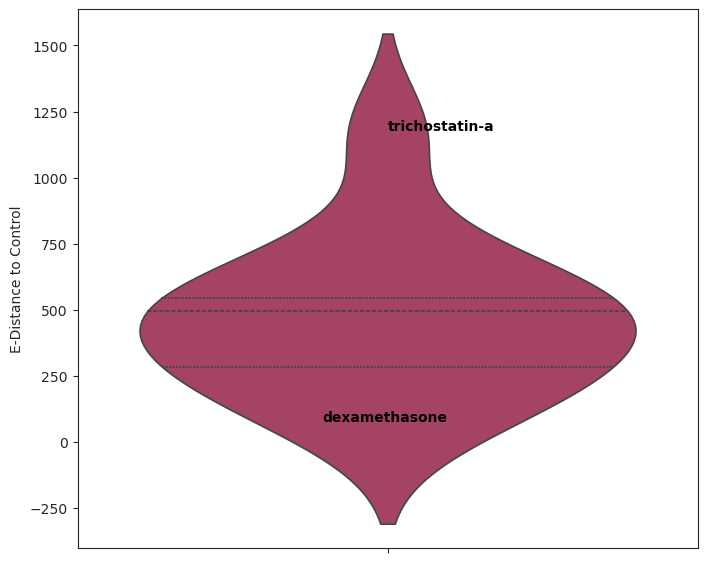

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def plot_distance_violin(sorted_control, num_selected=1, text_offset=0.1):
    """
    Plots the distance distribution of drugs from the control group as a violin plot,
    highlighting the top `num_selected` closest and farthest drugs while avoiding text overlap.

    Parameters:
    - sorted_control: Pandas DataFrame with 'distance' column (sorted in ascending order)
    - num_selected: Number of closest and farthest drugs to highlight
    - text_offset: Vertical offset to prevent text overlap
    """

    # Extract distances
    distances = sorted_control['distance'].values

    # Extract selected drug names and distances
    closest_drugs = sorted_control.index[:num_selected].tolist()
    farthest_drugs = sorted_control.index[-num_selected:].tolist()
    closest_distances = sorted_control['distance'][:num_selected].tolist()
    farthest_distances = sorted_control['distance'][-num_selected:].tolist()
    # Plot violin plot
    plt.figure(figsize=(8, 7))
    sns.violinplot(y=distances, color='#B5345C', inner="quartile")

    # Annotate closest drugs (adjusting y position to avoid overlap)
    for i, (drug, dist) in enumerate(zip(closest_drugs, closest_distances)):
        plt.text(x = (i-0.5) * (text_offset + 0.11), y=dist , s=drug, color="black", fontsize=10, fontweight="bold", verticalalignment='bottom')

    # Annotate farthest drugs (adjusting y position to avoid overlap)
    for i, (drug, dist) in enumerate(zip(farthest_drugs, farthest_distances)):
        plt.text(x = 0, y=dist, s=drug, color="black", fontsize=10, fontweight="bold", verticalalignment='bottom')

    # Labels and title
    plt.ylabel("E-Distance to Control")
    # Show plot
    plt.savefig('distance_dist.pdf', bbox_inches="tight", dpi=300)
    plt.show()

# Example usage (assuming `sorted_control` is a DataFrame with a 'distance' column sorted in ascending order)
plot_distance_violin(sorted_control)

In [27]:
cross_tab = pd.crosstab(adata.obs['cell_type'], adata.obs['condition'])
cross_tab

condition,control,dexamethasone,estradiol,fulvestrant,geldanamycin,genistein,olaparib,sirolimus,tamoxifen,trichostatin-a,vorinostat,wortmannin
cell_type,,,,,,,,,,,,
A375,4235,68,86,83,240,111,69,110,106,298,367,190
HT29,4014,67,91,82,238,117,63,106,101,237,291,207
MCF7,6447,106,343,130,732,153,86,286,140,692,937,640
PC3,5932,95,191,242,579,203,65,223,144,593,738,523
VCAP,4900,63,69,344,413,218,200,252,50,411,480,492


In [28]:
adata.obs.cell_type.unique()

['A375', 'HT29', 'MCF7', 'PC3', 'VCAP']
Categories (5, object): ['A375', 'HT29', 'MCF7', 'PC3', 'VCAP']

In [29]:
adata

AnnData object with n_obs × n_vars = 39689 × 978
    obs: 'cell_id', 'det_plate', 'det_well', 'lincs_phase', 'pert_dose', 'pert_dose_unit', 'pert_id', 'pert_iname', 'pert_mfc_id', 'pert_time', 'pert_time_unit', 'pert_type', 'rna_plate', 'rna_well', 'condition', 'cell_type', 'dose', 'cov_drug_dose_name', 'cov_drug_name', 'control', 'canonical_smiles', 'SMILES', 'paired_control_index', 'cell_type_split_0', 'cell_type_split_1', 'cell_type_split_2', 'cell_type_split_3', 'cell_type_split_4', 'random_split_0', 'random_split_1', 'random_split_2', 'random_split_3', 'random_split_4', 'drug_split_0', 'drug_split_1', 'drug_split_2', 'drug_split_3', 'drug_split_4', 'cov_drug_dose_name_split_0', 'cov_drug_dose_name_split_1', 'cov_drug_dose_name_split_2', 'cov_drug_dose_name_split_3', 'cov_drug_dose_name_split_4', 'cov_drug'
    var: 'pr_gene_title', 'pr_is_lm', 'pr_is_bing'
    uns: 'cydata_pull', 'pca'
    obsm: 'X_pca'
    varm: 'PCs'

In [30]:
sc.pp.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)

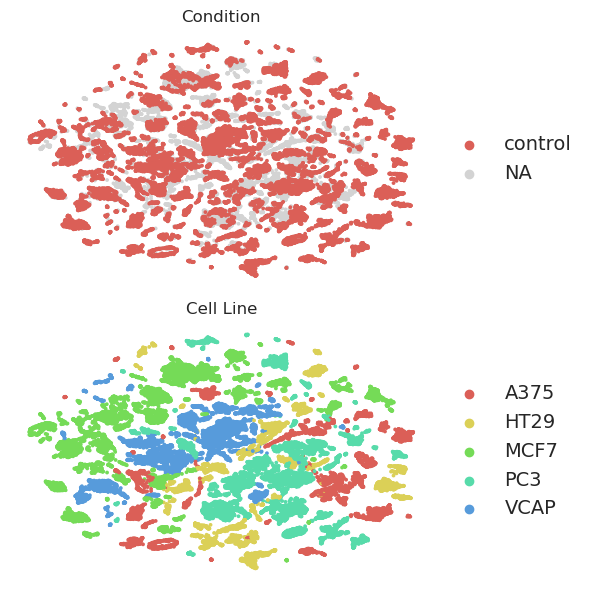

In [31]:
fig, axes = plt.subplots(nrows=2, figsize=(6, 6))  # Adjust figsize as needed

# Plot UMAP 1 in the first subplot
sc.pl.umap(adata=adata, color=["condition"], groups=["control"], legend_fontsize=14, ax=axes[0],
           title="Condition", show=False, palette=sns.color_palette("hls", 11),
           frameon=False, size=30)  # <-- Increased dot size here

# Plot UMAP 2 in the second subplot
sc.pl.umap(adata=adata, color=["cell_type"], legend_fontsize=14, ax=axes[1],
           title="Cell Line", show=False, palette=sns.color_palette("hls", 7),
           frameon=False, size=30)  # <-- Increased dot size here

# Adjust spacing between subplots
plt.tight_layout()

# Save and show the plot
plt.savefig('UMAP_LINCS.pdf', bbox_inches='tight')
plt.show()


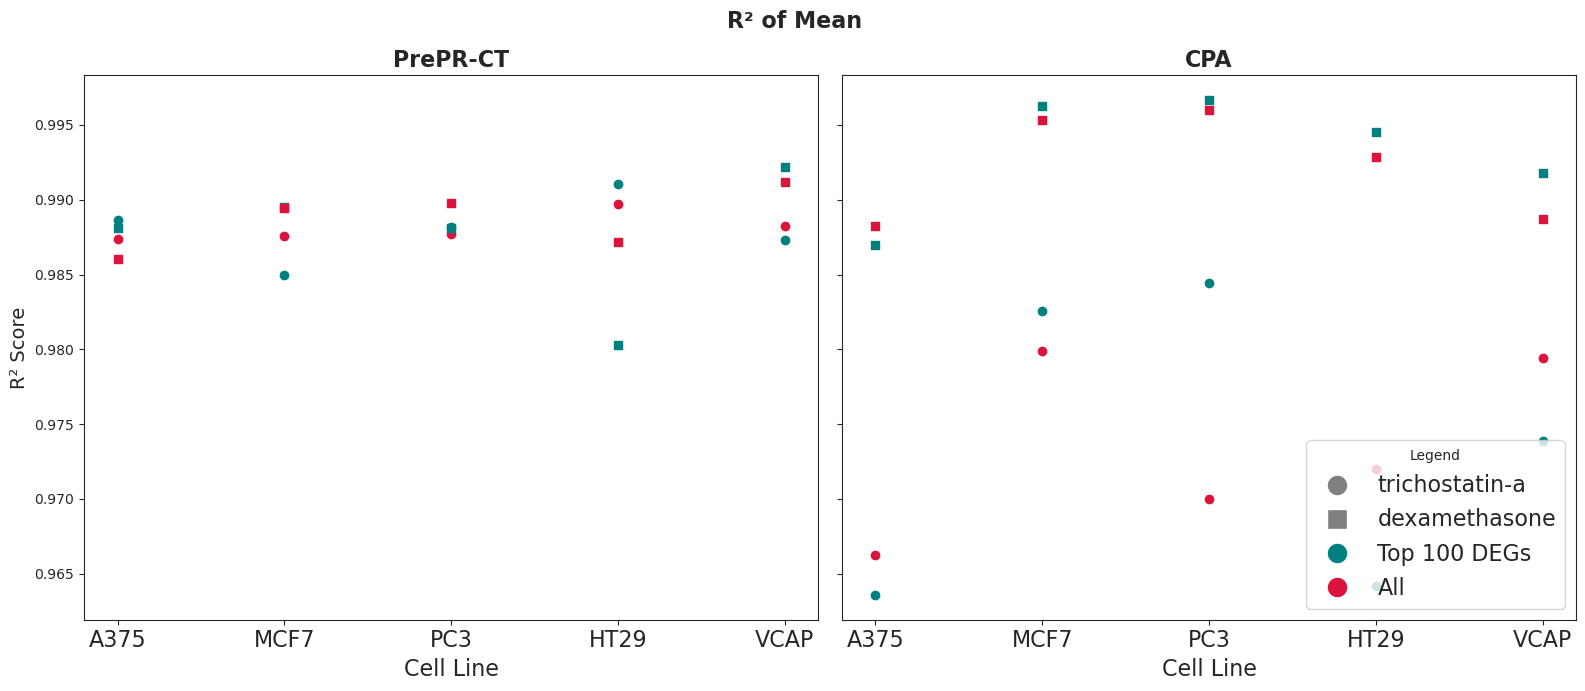

In [37]:
import matplotlib.pyplot as plt
import pandas as pd

#   condition cell_type n_top_deg  r2_mean_deg  r2_var_deg
# 0  dexamethasone      A375       100     0.988141    0.800519
# 1  dexamethasone      A375       all     0.986007    0.731966
# 2  dexamethasone      HT29       100     0.989522    0.904700
# 3  dexamethasone      HT29       all     0.989439    0.840723
# 4  dexamethasone      MCF7       100     0.988140    0.899935
# 5  dexamethasone      MCF7       all     0.989807    0.785523
# 6  dexamethasone       PC3       100     0.980290    0.839296
# 7  dexamethasone       PC3       all     0.987200    0.804258
# 8  dexamethasone      VCAP       100     0.992159    0.889096
# 9  dexamethasone      VCAP       all     0.991169    0.741993

#     condition cell_type n_top_deg  r2_mean_deg  r2_var_deg
# 0  trichostatin-a      A375       100     0.988639    0.660413
# 1  trichostatin-a      A375       all     0.987353    0.682772
# 2  trichostatin-a      MCF7       100     0.984993    0.647214
# 3  trichostatin-a      MCF7       all     0.987554    0.762194
# 4  trichostatin-a       PC3       100     0.988152    0.649594
# 5  trichostatin-a       PC3       all     0.987723    0.649613
# 6  trichostatin-a      HT29       100     0.991061    0.681559
# 7  trichostatin-a      HT29       all     0.989700    0.718806
# 8  trichostatin-a      VCAP       100     0.987320    0.447114
# 9  trichostatin-a      VCAP       all     0.988220    0.637819

# Combined Cell-Type-Specific-Graphs data for both perturbations
preprct = pd.DataFrame({
    "perturbation": ["trichostatin-a"]*10 + ["dexamethasone"]*10,
    "cell_type": ["A375", "A375", "MCF7", "MCF7", "PC3", "PC3", "HT29", "HT29", "VCAP", "VCAP"] * 2,
    "n_top_deg": ["100", "all"] * 5 * 2,
    "r2_mean_deg": [
        0.988639,  0.987353, 0.984993, 0.987554, 0.988152, 0.987723, 0.991061,  0.989700, 0.987320, 0.988220,
        0.988141,  0.986007, 0.989522, 0.989439, 0.988140, 0.989807, 0.980290 , 0.987200 , 0.992159, 0.991169,
    ]
})

#      condition cell_type n_top_deg  r2_mean_deg  r2_var_deg
# 0  trichostatin-a      A375       100     0.963580   -0.880031
# 1  trichostatin-a      A375       all     0.966243   -0.484624
# 2  trichostatin-a      MCF7       100     0.982530   -0.033649
# 3  trichostatin-a      MCF7       all     0.979909   -0.169496
# 4  trichostatin-a       PC3       100     0.984414   -0.581565
# 5  trichostatin-a       PC3       all     0.970024   -0.689657
# 6  trichostatin-a      HT29       100     0.964207   -0.529072
# 7  trichostatin-a      HT29       all     0.972004   -0.409826
# 8  trichostatin-a      VCAP       100     0.973892   -0.355348
# 9  trichostatin-a      VCAP       all     0.979431   -0.684256

#       condition cell_type n_top_deg  r2_mean_deg  r2_var_deg
# 0  dexamethasone      A375       100     0.986944   -0.425566
# 1  dexamethasone      A375       all     0.988271   -0.408576
# 2  dexamethasone      HT29       100     0.996240   -0.053594
# 3  dexamethasone      HT29       all     0.995325    0.100315
# 4  dexamethasone      MCF7       100     0.996658   -0.123677
# 5  dexamethasone      MCF7       all     0.996002   -0.159393
# 6  dexamethasone       PC3       100     0.994549   -0.268867
# 7  dexamethasone       PC3       all     0.992869   -0.140150
# 8  dexamethasone      VCAP       100     0.991807   -0.737550
# 9  dexamethasone      VCAP       all     0.988688   -0.375641

# Combined CPA data for both perturbations
cpa = pd.DataFrame({
    "perturbation": ["trichostatin-a"]*10 + ["dexamethasone"]*10,
    "cell_type": ["A375", "A375", "MCF7", "MCF7", "PC3", "PC3", "HT29", "HT29", "VCAP", "VCAP"] * 2,
    "n_top_deg": ["100", "all"] * 5 * 2,
    "r2_mean_deg": [
        0.963580, 0.966243, 0.982530, 0.979909, 0.984414, 0.970024, 0.964207, 0.972004, 0.973892, 0.979431,
        0.986944, 0.988271, 0.996240, 0.995325, 0.996658, 0.996002, 0.994549, 0.992869, 0.991807, 0.988688
    ]
})

# Plot settings
perturbation_markers = {"trichostatin-a": "o", "dexamethasone": "s"}
deg_colors = {"100": "teal", "all": "crimson"}

fig, axs = plt.subplots(1, 2, figsize=(16, 7), sharey=True)

for ax, df, title in zip(axs, [preprct, cpa], ["Cell-Type-Specific-Graphs", "CPA"]):
    for perturbation in df["perturbation"].unique():
        for n_deg in df["n_top_deg"].unique():
            subset = df[(df["perturbation"] == perturbation) & (df["n_top_deg"] == n_deg)]
            ax.scatter(subset["cell_type"], subset["r2_mean_deg"],
                       marker=perturbation_markers[perturbation],
                       color=deg_colors[n_deg],
                       label=f"{perturbation} - top {n_deg}")

    ax.set_title(title, fontsize=16, weight="bold")
    ax.set_xlabel("Cell Line", fontsize = 16)
    ax.set_xticklabels(df["cell_type"].unique(), rotation=0, fontsize = 16)
    ax.grid(False)

axs[0].set_ylabel("R² Score", fontsize = 14)

# Custom legends
from matplotlib.lines import Line2D

legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='trichostatin-a', markerfacecolor='gray', markersize=15),
    Line2D([0], [0], marker='s', color='w', label='dexamethasone', markerfacecolor='gray', markersize=15),
    Line2D([0], [0], marker='o', color='w', label='Top 100 DEGs', markerfacecolor='teal', markersize=15),
    Line2D([0], [0], marker='o', color='w', label='All', markerfacecolor='crimson', markersize=15),
]
axs[1].legend(handles=legend_elements, title="Legend", loc="lower right", fontsize = 16)

fig.suptitle("R² of Mean", fontsize=16, weight="bold")
plt.tight_layout()
plt.savefig("R2_LINCS.pdf", format="pdf", bbox_inches="tight")
plt.show()